<a href="https://colab.research.google.com/github/Natthaphatz007/bsc_dpdm24/blob/main/Chapter_V_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data prepare & Data Mining/bsc_dpdm24_data'

Mounted at /content/drive


In [3]:
apndx_data = pd.read_csv(os.path.join(path,'apndx.csv'))

In [ ]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


## Clean

In [ ]:
apndx_data.info() # checkNaN first

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                260000 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [ ]:
apndx_data['Chronic_Diseases'] #การติดโรคเรื้อรัง

,Chronic_Diseases
0,Diabetes
1,Diabetes
2,Diabetes
3,NaN
4,Hypertension
...,...
259995,Diabetes
259996,Hypertension
259997,NaN
259998,NaN


In [4]:
apndx_data["Chronic_Diseases"] = apndx_data["Chronic_Diseases"].fillna('No')

In [ ]:
apndx_data["Chronic_Diseases"]

,Chronic_Diseases
0,Diabetes
1,Diabetes
2,Diabetes
3,No
4,Hypertension
...,...
259995,Diabetes
259996,Hypertension
259997,No
259998,No


In [ ]:
apndx_data["Treatment_Type"]

,Treatment_Type
0,Surgery
1,Chemotherapy
2,Chemotherapy
3,Radiation
4,Radiation
...,...
259995,Surgery
259996,Radiation
259997,Chemotherapy
259998,Radiation


In [5]:
apndx_data["Treatment_Type"] = apndx_data["Treatment_Type"].fillna('No') #การรักษา

In [ ]:
apndx_data["Treatment_Type"].unique()

array(['Surgery', 'Chemotherapy', 'Radiation', 'No'], dtype=object)

In [ ]:
set(apndx_data['Symptom_Severity'])

{'Mild', 'Moderate', 'Severe'}

In [ ]:
apndx_data.groupby(['Symptom_Severity' , 'Appendix_Cancer_Prediction']).count()

Patient_ID  Country     Age  \
Symptom_Severity Appendix_Cancer_Prediction                                
Mild             No                              110229   110229  110229   
                 Yes                              19532    19532   19532   
Moderate         No                               77436    77436   77436   
                 Yes                              13761    13761   13761   
Severe           No                               33048    33048   33048   
                 Yes                               5994     5994    5994   

                                             Gender     BMI  Smoking_Status  \
Symptom_Severity Appendix_Cancer_Prediction                                   
Mild             No                          110229  110229          110229   
                 Yes                          19532   19532           19532   
Moderate         No                           77436   77436           77436   
                 Yes                          13761   13761           13761   
Severe           No                           33048   33048           33048   
                 Yes                           5994    5994            5994   

                                             Alcohol_Consumption  \
Symptom_Severity Appendix_Cancer_Prediction                        
Mild             No                                       110229   
                 Yes                                       19532   
Moderate         No                                        77436   
                 Yes                                       13761   
Severe           No                                        33048   
                 Yes                                        5994   

                                             Family_History_Cancer  \
Symptom_Severity Appendix_Cancer_Prediction                          
Mild             No                                         110229   
                 Yes                                         19532   
Moderate         No                                          77436   
                 Yes                                         13761   
Severe           No                                          33048   
                 Yes                                          5994   

                                             Genetic_Mutations  \
Symptom_Severity Appendix_Cancer_Prediction                      
Mild             No                                     110229   
                 Yes                                     19532   
Moderate         No                                      77436   
                 Yes                                     13761   
Severe           No                                      33048   
                 Yes                                      5994   

                                             Chronic_Diseases  ...  \
Symptom_Severity Appendix_Cancer_Prediction                    ...   
Mild             No                                    110229  ...   
                 Yes                                    19532  ...   
Moderate         No                                     77436  ...   
                 Yes                                    13761  ...   
Severe           No                                     33048  ...   
                 Yes                                     5994  ...   

                                             Previous_Cancers  Blood_Pressure  \
Symptom_Severity Appendix_Cancer_Prediction                                     
Mild             No                                    110229          110229   
                 Yes                                    19532           19532   
Moderate         No                                     77436           77436   
                 Yes                                    13761           13761   
Severe           No                                     33048           33048   
                 Yes                    

## Delete some data after knowed have be cancer or not

In [6]:
# prompt: drop columns Diagnosis_Delay_Days Treatment_Type Survival_Years_After_Diagnosis
apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis'])

In [ ]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,No,No,179,236,6.7,4.9,396,Negative,Mild,No


## delete some data that can't to be create model

In [7]:
apndx_data = apndx_data.drop(columns=['Patient_ID','Country'])

In [ ]:
apndx_data.shape

(260000, 20)

## apply data into integer

In [ ]:
# prompt: transform string into integer

# Convert 'Symptom_Severity' to numeric representation
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map({'Mild': 1, 'Moderate': 2, 'Severe': 3})

# Convert 'Chronic_Diseases' to numeric representation (assuming 'Yes' and 'No')
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].map({'No': 0, 'Yes': 1})

# Convert 'Gender' to numeric representation
apndx_data['Gender'] = apndx_data['Gender'].map({'Female': 0, 'Male': 1})

# Convert 'Appendix_Cancer_Prediction' to numeric representation
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map({'No': 0, 'Yes': 1})

apndx_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      254767 non-null  float64
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  object 
 4   Alcohol_Consumption         260000 non-null  object 
 5   Family_History_Cancer       260000 non-null  object 
 6   Genetic_Mutations           260000 non-null  object 
 7   Chronic_Diseases            130087 non-null  float64
 8   Physical_Activity_Level     260000 non-null  object 
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  object 
 11  Previous_Cancers            260000 non-null  object 
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [ ]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  object 
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  object 
 4   Alcohol_Consumption         260000 non-null  object 
 5   Family_History_Cancer       260000 non-null  object 
 6   Genetic_Mutations           260000 non-null  object 
 7   Chronic_Diseases            260000 non-null  object 
 8   Physical_Activity_Level     260000 non-null  object 
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  object 
 11  Previous_Cancers            260000 non-null  object 
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [8]:
mapping = {'No' : 0 , 'Yes' : 1}
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(mapping)

mapping = {'Low' : 0 , 'Moderate' : 1, 'High' : 2}
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(mapping)

mapping = {'No' : 0 , 'Yes' : 1}
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(mapping)

mapping = {'No' : 0 , 'Yes' : 1}
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(mapping)

mapping = {'Low' : 0 , 'Moderate' : 1, 'High' : 2}
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(mapping)

mapping = {'No' : 0 , 'Yes' : 1}
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(mapping)

mapping = {'No' : 0 , 'Yes' : 1}
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(mapping)

mapping = {'Negative' : 0 , 'Positive' : 1}
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(mapping)

mapping = {'Mild' : 0 , 'Moderate' : 1, 'Severe' : 2}
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(mapping)

In [ ]:
apndx_data['Symptom_Severity'].unique()

array(['Mild', 'Moderate', 'Severe'], dtype=object)

In [ ]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  object 
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  int64  
 4   Alcohol_Consumption         260000 non-null  int64  
 5   Family_History_Cancer       260000 non-null  int64  
 6   Genetic_Mutations           260000 non-null  int64  
 7   Chronic_Diseases            260000 non-null  object 
 8   Physical_Activity_Level     260000 non-null  int64  
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  int64  
 11  Previous_Cancers            260000 non-null  int64  
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [9]:
# prompt: transform Chronic_Diseases Gender Diet_Type using one-hot-encoder

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the specified columns
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])

# Transform the columns
onehotlabels = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()

# Create new column names for the one-hot encoded features
feature_names = []
for i, col in enumerate(['Chronic_Diseases', 'Gender', 'Diet_Type']):
    for cat in enc.categories_[i]:
      feature_names.append(f'{col}_{cat}')

# Create a new DataFrame with the one-hot encoded features
onehot_df = pd.DataFrame(onehotlabels, columns=feature_names)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
apndx_data = pd.concat([apndx_data, onehot_df], axis=1)

# Optionally, drop the original columns if needed
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)

apndx_data.head()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Appendix_Cancer_Prediction,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,Yes,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,No,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,No,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,No,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,No,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [10]:
mapping = {'No' : 0 , 'Yes' : 1}
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map(mapping)

In [11]:
apndx_data.head()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Appendix_Cancer_Prediction,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
apndx_data['Physical_Activity_Level'].unique()

array([nan])

# split data into train and test. Test that keep to compare is last result

In [49]:
# prompt: random sampling 60000 data and also keep the rest

from sklearn.model_selection import train_test_split

# Assuming 'apndx_data' is your DataFrame
train_data, test_data = train_test_split(apndx_data, train_size=200000, random_state=5)

print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)


Shape of train_data: (200000, 26)
Shape of test_data: (60000, 26)


In [50]:
train_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,169795,169795,169795,169795,169795,169795,169795,169795,169795,169795,...,169795,169795,169795,169795,169795,169795,169795,169795,169795,169795
1,30205,30205,30205,30205,30205,30205,30205,30205,30205,30205,...,30205,30205,30205,30205,30205,30205,30205,30205,30205,30205


In [14]:
30335/169665

0.17879350484778828

In [51]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,50918,50918,50918,50918,50918,50918,50918,50918,50918,50918,...,50918,50918,50918,50918,50918,50918,50918,50918,50918,50918
1,9082,9082,9082,9082,9082,9082,9082,9082,9082,9082,...,9082,9082,9082,9082,9082,9082,9082,9082,9082,9082


In [16]:
8952/51048

0.17536436295251528

# select the best model (Model Selection)

1.   Decision Tree
2.   (Short) Decision Tree
3.   Naive Bayes

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Split data into 10 folds

In [18]:
kf = KFold(n_splits=10, shuffle=True, random_state=7)

In [19]:
X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1) # drop last column
y_train = train_data['Appendix_Cancer_Prediction'] # data in last column

## Decision Tree

In [21]:
# import
from sklearn.tree import DecisionTreeClassifier
# Define
dt_classifier = DecisionTreeClassifier() # default
# train and evaluation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [22]:
# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)
# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-validation scores: [0.7225  0.7263  0.72535 0.7261  0.7163  0.7284  0.7225  0.7256  0.72465
 0.7237 ]
Mean Accuracy: 0.72414
Standard Deviation: 0.0031232835285961357


## (Short) Decision Tree

In [23]:
# import
from sklearn.tree import DecisionTreeClassifier
# Define
sdt_classifier = DecisionTreeClassifier(max_depth=5) # default
# train and evaluation (cross validation)
cv_scores = cross_val_score(sdt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [24]:
# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)
# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-validation scores: [0.8483  0.8477  0.849   0.85045 0.84415 0.8521  0.84305 0.84565 0.8512
 0.8503 ]
Mean Accuracy: 0.8481900000000001
Standard Deviation: 0.002898430609830086


## Naive Bayes

In [25]:
#import
from sklearn.naive_bayes import GaussianNB
# Define
nb_classifier = GaussianNB()
# train and evaluation (cross validation)
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [26]:
#Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-validation scores: [0.8485  0.84785 0.8491  0.8507  0.8441  0.8523  0.8431  0.8458  0.85145
 0.85035]
Mean Accuracy: 0.848325
Standard Deviation: 0.002961270842054148


## Choose the best model (Naive Bayes) to train by all training data

In [28]:
# import
from sklearn.tree import DecisionTreeClassifier
# Define
nbt_classifier = GaussianNB() # default
# train and
nbt_classifier.fit(X_train, y_train)

GaussianNB()

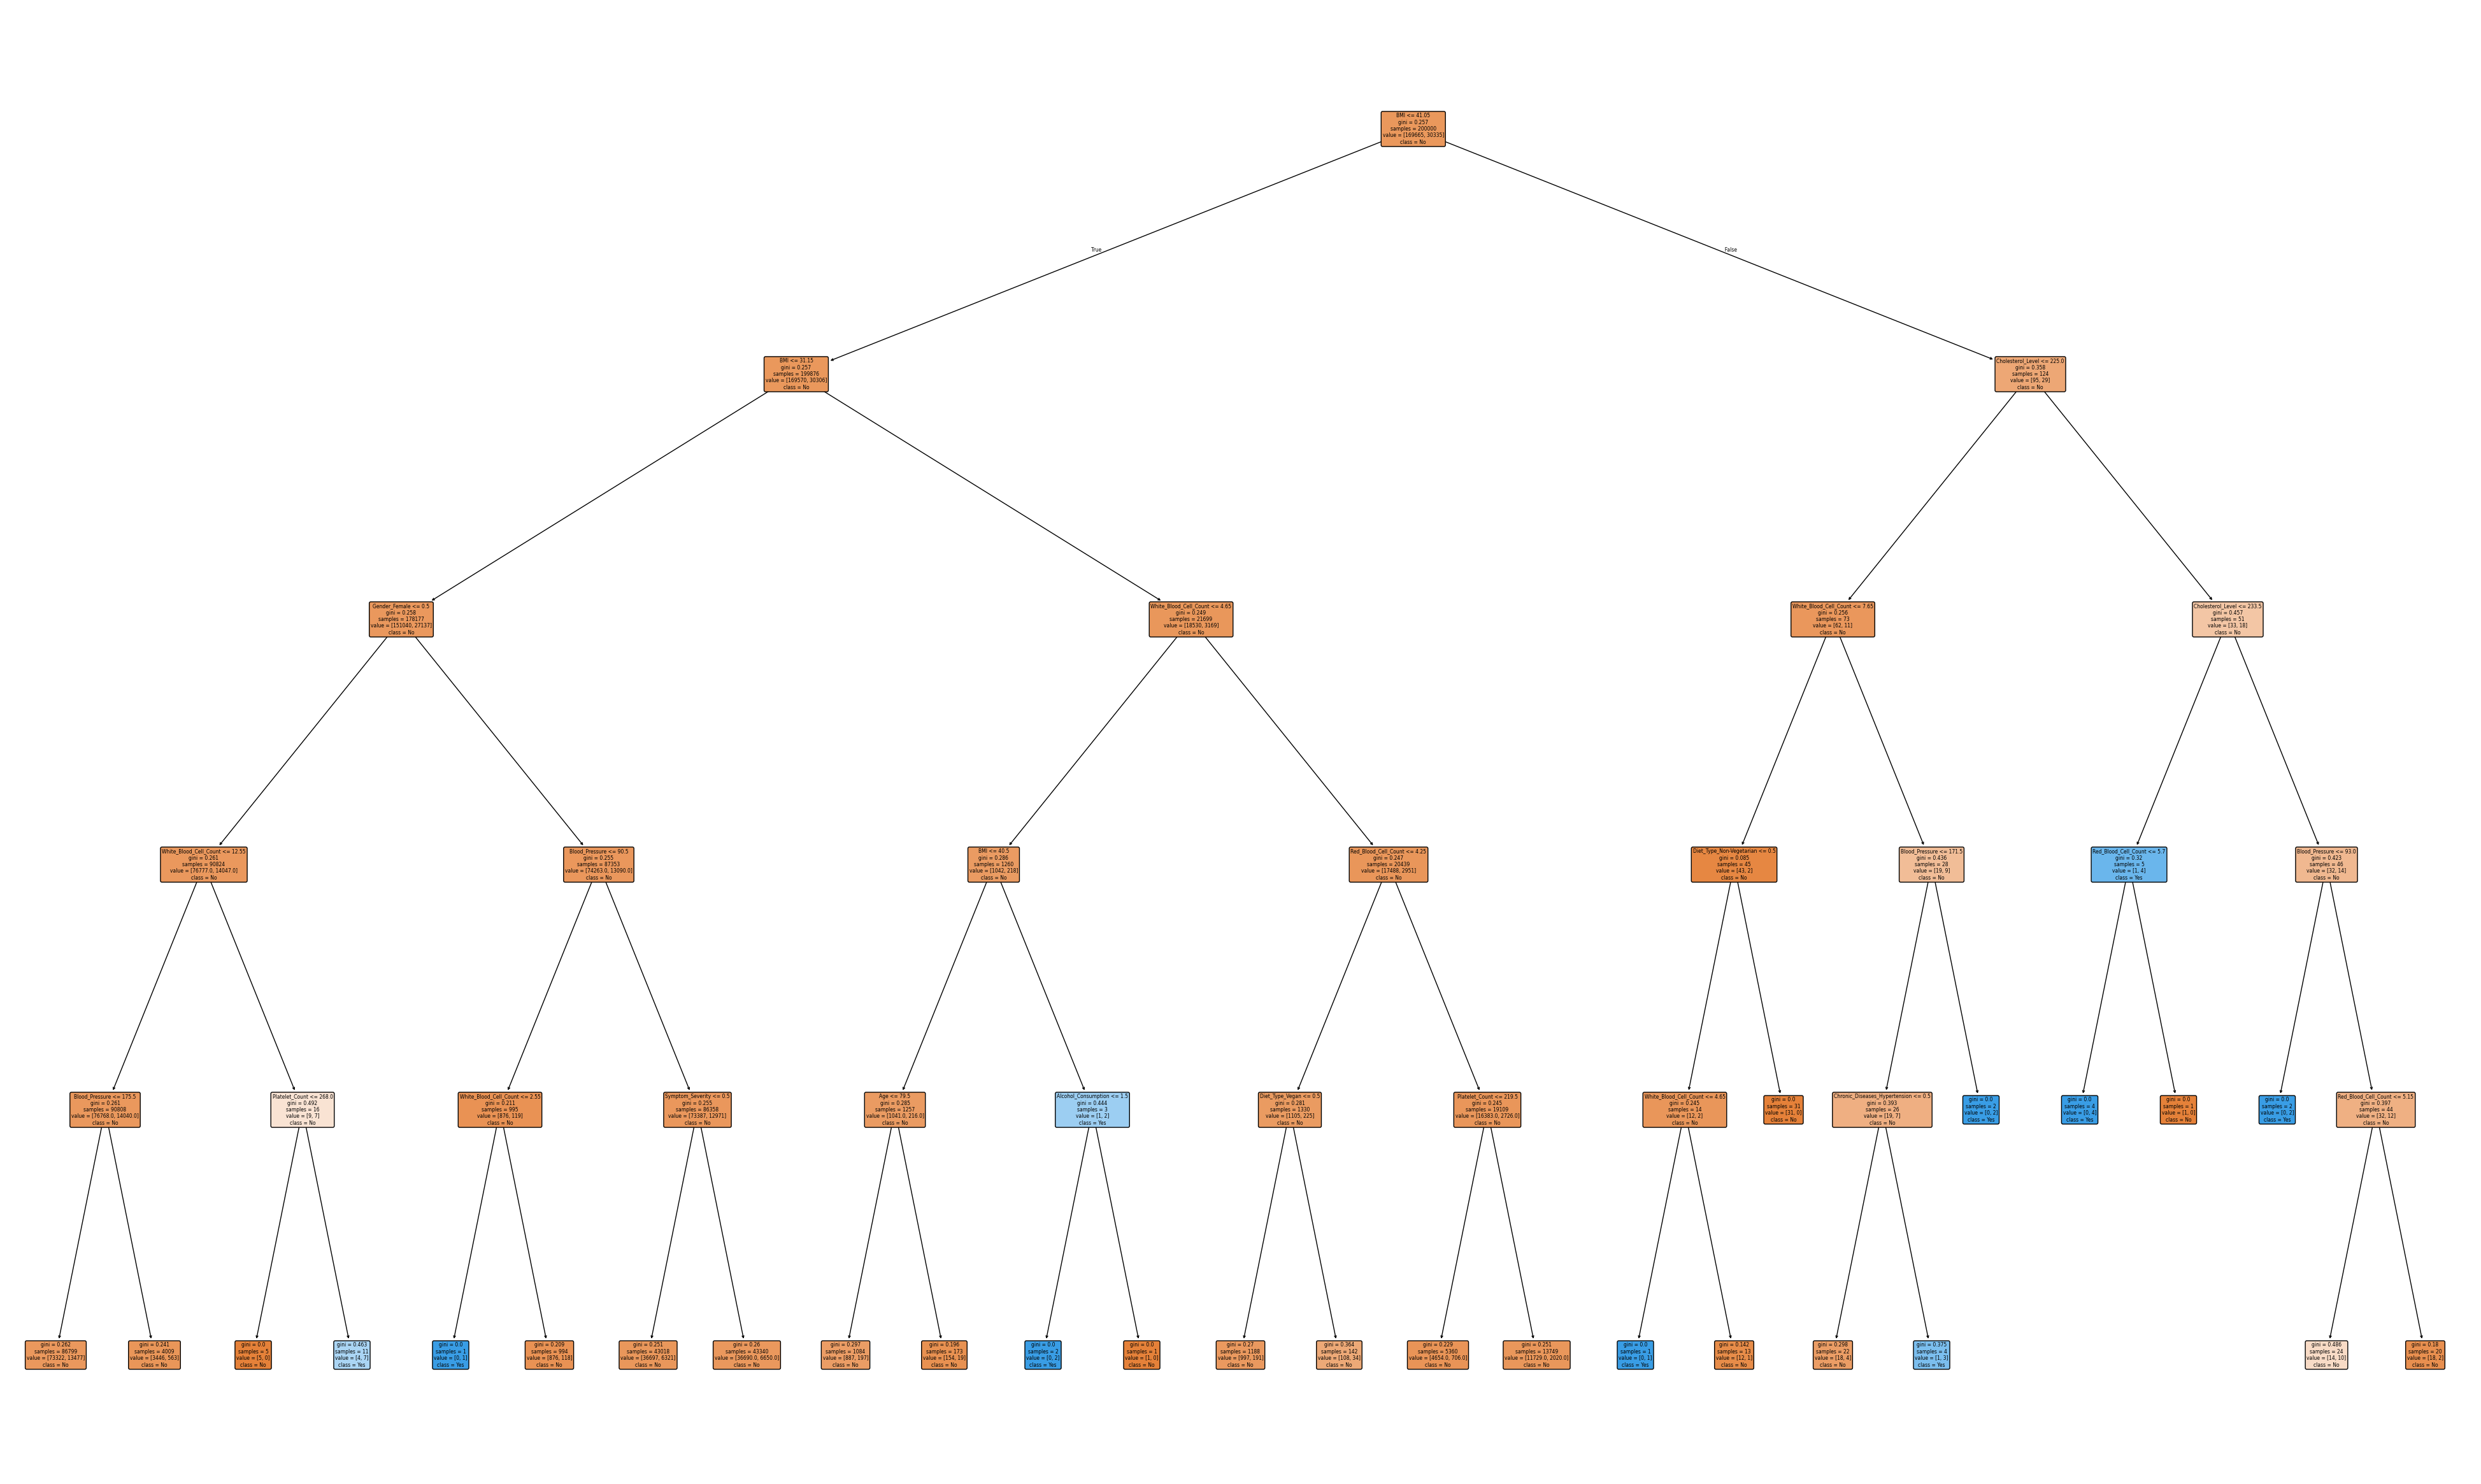

In [29]:
# prompt: show the trained tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'sdt_classifier' is your trained DecisionTreeClassifier
plt.figure(figsize=(50,30))
plot_tree(sdt_classifier, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()


## วัดผลด้วย test data

In [30]:
X_test = test_data.drop('Appendix_Cancer_Prediction', axis=1) # drop last column
y_actual = test_data['Appendix_Cancer_Prediction'] # data in last column

In [31]:
#predict
y_pred = nbt_classifier.predict(X_test)
#evaluate
accuracy = accuracy_score(y_actual, y_pred) #don't swap first y = y_actual second y = y_pred
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8508


# Quiz12 : Train model เพิ่มอีก 1 model accuracy more than 0.8489

In [64]:
kf = KFold(n_splits=10, shuffle=True, random_state=4)

In [53]:
X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1) # drop last column
y_train = train_data['Appendix_Cancer_Prediction'] # data in last column

In [65]:
# import
from sklearn.tree import DecisionTreeClassifier
# Define
sdtq_classifier = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, criterion='gini')
# train and evaluation (cross validation)
cv_scores = cross_val_score(sdtq_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [66]:
# Print the cross-validation scores for each fold
# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)
# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-validation scores: [0.84475 0.8505  0.84635 0.8534  0.8508  0.8455  0.8476  0.8504  0.8503
 0.84955]
Mean Accuracy: 0.8489150000000001
Standard Deviation: 0.002608165063794852


In [ ]:
# train
sdtq_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5)

In [ ]:
# import
from sklearn.tree import DecisionTreeClassifier
# Define
sdtq_classifier = DecisionTreeClassifier(max_depth=5) # default
# train
sdtq_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predict
y_pred = sdtq_classifier.predict(X_test)
#evaluate
accuracy = accuracy_score(y_actual, y_pred) #don't swap first y = y_actual second y = y_pred
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8493166666666667
